In [17]:
!git init

Reinitialized existing Git repository in /Users/medamin/_Projets/_DataScience/DirectOfInformaiton_Project/.git/


In [19]:
!git add .

In [ ]:
!git commit -m " Dirinfo repo"

In [21]:
!git remote add origin https://github.com/DatascienceBH/Sagemaker_DirInfo.git

fatal: remote origin already exists.


In [22]:
!git remote -v

origin	https://github.com/DatascienceBH/Sagemaker_DirInfo.git (fetch)
origin	https://github.com/DatascienceBH/Sagemaker_DirInfo.git (push)


In [23]:
!git push -u origin master 

Enumerating objects: 3174, done.
Counting objects: 100% (3174/3174), done.
Delta compression using up to 4 threads
Compressing objects: 100% (3172/3172), done.
Writing objects: 100% (3174/3174), 84.51 MiB | 199.00 KiB/s, done.
Total 3174 (delta 507), reused 0 (delta 0)
remote: Resolving deltas: 100% (507/507), done.
To https://github.com/DatascienceBH/Sagemaker_DirInfo.git
 * [new branch]      master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.


In [138]:
import pandas as pd
import numpy as np

In [139]:
df = pd.read_csv("data/df.csv",encoding="utf-8-sig",  header = 0)

In [140]:
df.tail()

,Unnamed: 0,STUDENT_NO,COURSE_CODE,TERM,ACH,MID,FINAL,SEM_AVG1,GENDER,GOVERNORATE,SCHOOL
118996,118997,2839201688,<U+0628><U+062F><U+0646>201,2,30.0,20.0,50.0,98.2,1,3,ISA BIN ALI AL-KHALIFA SEC. BOY'S
118997,118998,2839201688,<U+062A><U+0642><U+0646>105,2,30.0,20.0,50.0,98.2,1,3,ISA BIN ALI AL-KHALIFA SEC. BOY'S
118998,118999,2839201688,<U+0641><U+064A><U+0632>210,5,0.0,28.0,59.0,92.4,1,3,ISA BIN ALI AL-KHALIFA SEC. BOY'S
118999,119000,2839201688,<U+062D><U+064A><U+0627>211,3,30.0,17.0,43.5,92.5,1,3,ISA BIN ALI AL-KHALIFA SEC. BOY'S
119000,119001,2839201688,<U+0639><U+0631><U+0628>201,3,30.0,18.5,48.0,92.5,1,3,ISA BIN ALI AL-KHALIFA SEC. BOY'S


In [141]:
df=df.drop("Unnamed: 0", axis=1)

In [60]:
# df.index=df.STUDENT_NO

In [62]:
# df=df.drop("STUDENT_NO", axis=1)

In [142]:
df.head()

,STUDENT_NO,COURSE_CODE,TERM,ACH,MID,FINAL,SEM_AVG1,GENDER,GOVERNORATE,SCHOOL
0,17152016100,<U+0639><U+0631><U+0628>301,5,29.0,17.5,40.5,84.5,2,3,AL-A'AHD AL-ZAHER INTER-SEC. GIRL'S
1,17152016100,<U+0628><U+062F><U+0646>215,6,30.0,20.0,50.0,87.3,2,3,AL-A'AHD AL-ZAHER INTER-SEC. GIRL'S
2,17152016100,<U+0631><U+064A><U+0636>151,1,29.5,13.5,39.5,90.5,2,3,AL-A'AHD AL-ZAHER INTER-SEC. GIRL'S
3,17152016100,<U+062B><U+0642><U+0641>101,1,30.0,18.5,48.0,90.5,2,3,AL-A'AHD AL-ZAHER INTER-SEC. GIRL'S
4,17152016100,<U+0631><U+064A><U+0636>152,2,29.0,18.0,38.5,87.8,2,3,AL-A'AHD AL-ZAHER INTER-SEC. GIRL'S


In [ ]:
ct=["<50", "60"]
df['bucket']=pd.cut(df['marks'],5,labels=['Poor','Below_average','Average','Above_Average','Excellent'])

In [5]:
df.keys()

Index(['Unnamed: 0', 'STUDENT_NO', 'COURSE_CODE', 'TERM', 'ACH', 'MID',
       'FINAL', 'SEM_AVG1', 'GENDER', 'GOVERNORATE', 'SCHOOL'],
      dtype='object')

In [78]:
df.STUDENT_NO.count()

119001

In [79]:
df.shape

(119001, 10)

In [80]:
df.STUDENT_NO.value_counts()

1848201657      55
1848201651      55
1848201686      55
1848201683      55
1848201688      55
                ..
283220163710    16
28052016893     16
28222016410     16
18082016996     16
28222016415     16
Name: STUDENT_NO, Length: 2252, dtype: int64

In [81]:
#Select all the columns that are not numeric using the following code:
data_column_category = df.select_dtypes(exclude=[np.number]).columns

data_column_category

Index(['COURSE_CODE', 'SCHOOL'], dtype='object')

In [82]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in data_column_category:

    df[i] = label_encoder.fit_transform(df[i])

print("Label Encoded Data: ")

df.sort_values(["STUDENT_NO", "TERM"], ascending = True).head(20)

Label Encoded Data: 


,STUDENT_NO,COURSE_CODE,TERM,ACH,MID,FINAL,SEM_AVG1,GENDER,GOVERNORATE,SCHOOL
3119,171520167,37,1,28.5,15.0,44.5,90.9,2,3,2
3125,171520167,26,1,29.5,19.5,48.5,90.9,2,3,2
3127,171520167,45,1,30.0,17.0,42.0,90.9,2,3,2
3130,171520167,0,1,29.5,19.0,43.0,90.9,2,3,2
3133,171520167,12,1,30.0,20.0,48.5,90.9,2,3,2
3135,171520167,24,1,30.0,20.0,41.0,90.9,2,3,2
3139,171520167,32,1,30.0,19.5,43.5,90.9,2,3,2
3152,171520167,57,1,28.5,15.0,40.0,90.9,2,3,2
3114,171520167,3,2,30.0,20.0,46.5,92.4,2,3,2
3115,171520167,7,2,30.0,17.5,40.5,92.4,2,3,2


In [ ]:
df.groupby([])

In [83]:
df.COURSE_CODE.sort_values().ravel()

array([ 0,  0,  0, ..., 67, 67, 67])

In [84]:
df.COURSE_CODE.unique()

array([49, 17, 37, 24, 38, 64,  5, 51, 39, 31, 41, 42,  6, 58, 11, 18, 35,
       60, 30, 63, 59, 62,  7, 34, 57,  0, 55, 46, 47, 48, 43, 27, 26, 65,
       45, 67, 10, 33,  2, 22,  8, 12, 29, 61, 16, 36,  3, 50, 25, 13,  1,
       32, 40,  9, 53, 54, 19, 52, 15, 28, 66, 14, 56, 23,  4, 44, 20, 21])

In [85]:
type(df.COURSE_CODE)

pandas.core.series.Series

In [86]:
df.COURSE_CODE=df.COURSE_CODE.apply(str)

In [87]:
df.index

RangeIndex(start=0, stop=119001, step=1)

In [ ]:
df2=df.pivot(index="STUDENT_NO", columns="TERM", values="SEM_AVG1")
#flatten index - I assumed that's what you're going for:
# df2.columns=["_".join(el) for el in df2.columns ] 

In [54]:
df2 

,0_TERM,1_TERM,10_TERM,11_TERM,12_TERM,13_TERM,14_TERM,15_TERM,16_TERM,17_TERM,...,61_SEM_AVG1,62_SEM_AVG1,63_SEM_AVG1,64_SEM_AVG1,65_SEM_AVG1,66_SEM_AVG1,67_SEM_AVG1,7_SEM_AVG1,8_SEM_AVG1,9_SEM_AVG1
STUDENT_NO,,,,,,,,,,,,,,,,,,,,,
171520167,1.0,5.0,3.0,NaN,4.0,NaN,NaN,2.0,NaN,1.0,...,87.3,93.8,NaN,92.4,92.4,87.3,91.5,NaN,NaN,93.8
180220161,1.0,5.0,3.0,4.0,4.0,NaN,NaN,2.0,NaN,1.0,...,99.9,99.4,NaN,99.8,99.8,99.7,99.4,NaN,99.4,NaN
180220163,1.0,5.0,3.0,4.0,4.0,NaN,NaN,2.0,NaN,1.0,...,95.8,95.7,NaN,95.6,95.6,95.8,95.8,NaN,95.7,NaN
180220165,1.0,5.0,3.0,4.0,4.0,NaN,NaN,2.0,NaN,1.0,...,97.4,97.2,NaN,95.5,95.5,96.0,95.8,NaN,97.2,NaN
180220167,1.0,5.0,3.0,4.0,4.0,NaN,NaN,2.0,NaN,1.0,...,79.5,76.5,NaN,86.2,86.2,80.0,83.1,NaN,76.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184520169356,NaN,5.0,5.0,NaN,4.0,NaN,6.0,NaN,NaN,NaN,...,72.6,78.2,NaN,NaN,NaN,71.3,78.2,NaN,69.0,NaN
184820161441,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.7,96.5,NaN,NaN,NaN,NaN,NaN,NaN,96.5,93.7
283220163065,1.0,5.0,3.0,NaN,4.0,NaN,NaN,2.0,NaN,1.0,...,74.0,82.4,82.4,77.2,77.2,74.0,81.5,NaN,NaN,NaN


In [37]:
df2.shape

(2252, 340)

In [46]:
df2.keys()

Index(['0_TERM', '1_TERM', '10_TERM', '11_TERM', '12_TERM', '13_TERM',
       '14_TERM', '15_TERM', '16_TERM', '17_TERM',
       ...
       '61_SEM_AVG1', '62_SEM_AVG1', '63_SEM_AVG1', '64_SEM_AVG1',
       '65_SEM_AVG1', '66_SEM_AVG1', '67_SEM_AVG1', '7_SEM_AVG1', '8_SEM_AVG1',
       '9_SEM_AVG1'],
      dtype='object', length=340)

In [47]:
df2.loc[1:,[ e for  e in df2.columns if "SEM_AVG1" in e]]

,0_SEM_AVG1,1_SEM_AVG1,10_SEM_AVG1,11_SEM_AVG1,12_SEM_AVG1,13_SEM_AVG1,14_SEM_AVG1,15_SEM_AVG1,16_SEM_AVG1,17_SEM_AVG1,...,61_SEM_AVG1,62_SEM_AVG1,63_SEM_AVG1,64_SEM_AVG1,65_SEM_AVG1,66_SEM_AVG1,67_SEM_AVG1,7_SEM_AVG1,8_SEM_AVG1,9_SEM_AVG1
STUDENT_NO,,,,,,,,,,,,,,,,,,,,,
171520167,90.9,87.3,87.3,93.8,90.9,92.4,NaN,NaN,NaN,93.8,...,92.4,87.3,91.5,87.3,93.8,NaN,92.4,92.4,87.3,91.5
180220161,99.8,99.9,99.9,99.4,99.8,99.8,NaN,NaN,99.4,NaN,...,99.8,99.7,99.1,99.9,99.4,NaN,99.8,99.8,99.7,99.4
180220163,94.7,95.8,95.8,95.7,94.7,95.6,NaN,NaN,95.7,NaN,...,95.6,95.8,95.8,95.8,95.7,NaN,95.6,95.6,95.8,95.8
180220165,94.2,97.4,97.4,97.2,94.2,95.5,NaN,NaN,97.2,NaN,...,95.5,96.0,95.8,97.4,97.2,NaN,95.5,95.5,96.0,95.8
180220167,78.4,79.5,79.5,76.5,78.4,86.2,NaN,NaN,76.5,NaN,...,86.2,80.0,83.1,79.5,76.5,NaN,86.2,86.2,80.0,83.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184520169356,NaN,72.6,72.6,78.2,NaN,NaN,NaN,NaN,69.0,NaN,...,NaN,71.3,69.0,72.6,78.2,NaN,NaN,NaN,71.3,78.2
184820161441,NaN,93.7,93.7,96.5,NaN,NaN,NaN,NaN,96.5,93.7,...,NaN,NaN,NaN,93.7,96.5,NaN,NaN,NaN,NaN,NaN
283220163065,75.7,74.0,74.0,82.4,75.7,77.2,NaN,NaN,NaN,NaN,...,77.2,73.6,81.5,74.0,82.4,82.4,77.2,77.2,74.0,81.5


In [ ]:
[ e for  e in df2.columns if "SEM_AVG1" in e]

# Build multiclass classifiers with Amazon SageMaker linear learner


In [2]:
# import data science and visualization libraries
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
# download the raw data and unzip
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
!gunzip covtype.data.gz

dyld: Library not loaded: /usr/local/opt/openssl/lib/libssl.1.0.0.dylib
  Referenced from: /usr/local/bin/wget
  Reason: image not found
gunzip: can't stat: covtype.data.gz (covtype.data.gz.gz): No such file or directory


In [3]:
import seaborn as sns
titanic=sns.load_dataset("titanic")

In [4]:
titanic.groupby("sex").survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [8]:
titanic.groupby(["sex", "class"]).survived.agg(["mean", "median"])

mean  median
sex    class                   
female First   0.968085     1.0
       Second  0.921053     1.0
       Third   0.500000     0.5
male   First   0.368852     0.0
       Second  0.157407     0.0
       Third   0.135447     0.0

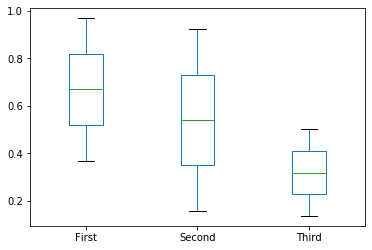

In [131]:
titanic.pivot_table("survived", index="sex", columns="class").plot(kind='box')

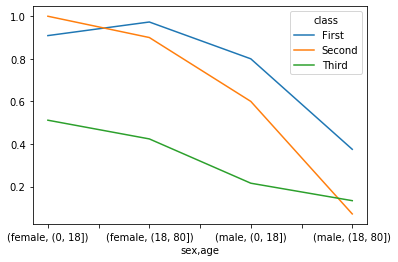

In [144]:
age=pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived', ['sex',age], 'class').plot()

In [135]:
titanic.pivot_table(index="sex", columns="class", aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [137]:
titanic.pivot_table(index="sex", columns="class", values="survived" , margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838
